In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import scienceplots  
plt.style.use(['science','notebook', 'grid'])
# plt.style.use('seaborn')

from matplotlib import rc
rc('text', usetex=True)
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : '14'}
rc('font', **font)

In [30]:
# velocity of string 1
v1 = np.array([53.208,76.344,90.720,108.000,122.160])
v3 = np.array([50.02,73.70,89.28,105.60,120.72])
v2 = np.array([58.56,84.00,105.65,118.80,135.36])
# Tension of string 1
T = np.array([5.1269,10.2538,15.3807,20.5076,25.6345])
sqrt_T = np.array([2.26427,3.20216,3.92182,4.52853,5.06305])

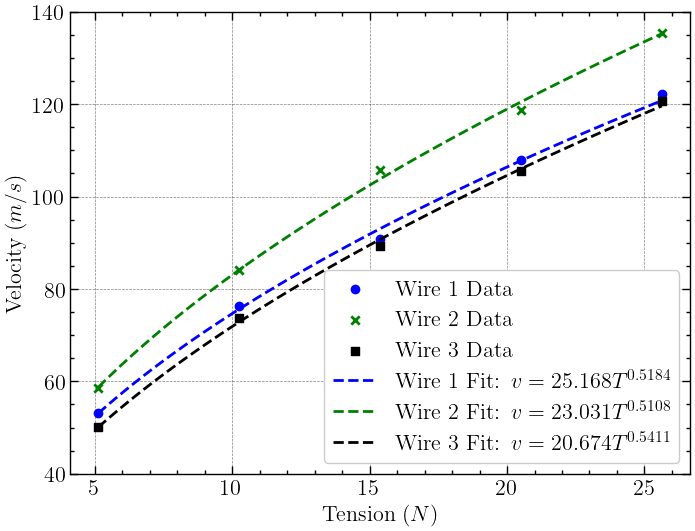

Wire 1: v = 23.0313 * T^0.5108
Wire 2: v = 25.1680 * T^0.5184
Wire 3: v = 20.6765 * T^0.5411


In [44]:
def power_law_fit(T, v):
    log_T = np.log(T)
    log_v = np.log(v)
    coef = np.polyfit(log_T, log_v, 1)  # Linear fit in log-log space
    b = coef[0]  # Power exponent
    a = np.exp(coef[1])  # Convert ln(a) back to a
    return a, b

# Fit power-law models
a1, b1 = power_law_fit(T, v1)
a2, b2 = power_law_fit(T, v2)
a3, b3 = power_law_fit(T, v3)
 
# Generate smooth fitted curves
T_fit = np.linspace(min(T), max(T), 100)
v1_fit = a1 * T_fit**b1
v2_fit = a2 * T_fit**b2
v3_fit = a3 * T_fit**b3

# Plot data and fits
plt.figure(figsize=(8,6))
plt.scatter(T, v1, label="Wire 1 Data", color="b", marker='o')
plt.scatter(T, v2, label="Wire 2 Data", color="g", marker='x')
plt.scatter(T, v3, label="Wire 3 Data", color="k", marker='s')

plt.plot(T_fit, v1_fit, 'b--', label="Wire 1 Fit: $v = 25.168 T^{0.5184}$")
plt.plot(T_fit, v2_fit, 'g--', label="Wire 2 Fit: $v = 23.031T^{0.5108}$")
plt.plot(T_fit, v3_fit, 'k--', label="Wire 3 Fit: $v = 20.674T^{0.5411}$")

# Labels and legend
plt.xlabel("Tension ($N$)")
plt.ylabel("Velocity ($m/s$)")
# plt.title("Velocity vs. Tension for Three Wires")
plt.legend()
plt.ylim(40, 140)
# plt.savefig('main.png')
plt.show()

# Print results
print(f"Wire 1: v = {a1:.4f} * T^{b1:.4f}")
print(f"Wire 2: v = {a2:.4f} * T^{b2:.4f}")
print(f"Wire 3: v = {a3:.4f} * T^{b3:.4f}")

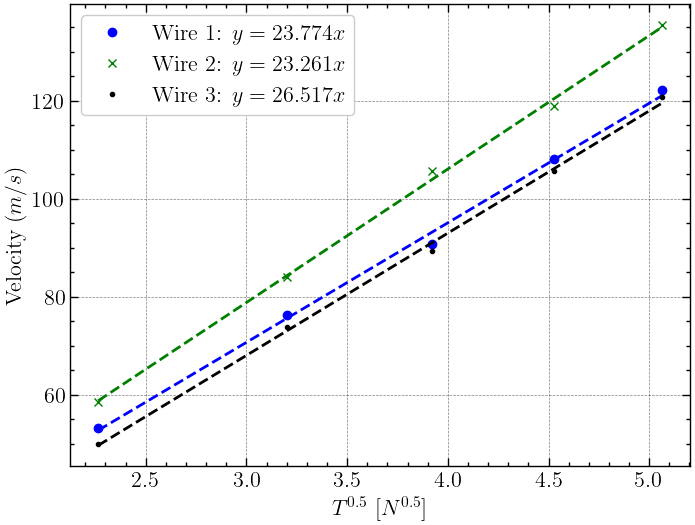

In [32]:
fig, ax = plt.subplots()

# Plot markers and store handles
marker1, = ax.plot(sqrt_T, v1, 'bo', label='Wire 1: $y=23.774x$')
line1, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v1, 1))(sqrt_T), '--b')

marker2, = ax.plot(sqrt_T, v2, 'gx', label='Wire 2: $y = 23.261x$')
line2, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v2, 1))(sqrt_T), '--g')

marker3, = ax.plot(sqrt_T, v3, 'k.', label='Wire 3: $y = 26.517x$')
line3, = ax.plot(sqrt_T, np.poly1d(np.polyfit(sqrt_T, v3, 1))(sqrt_T), '--k')

# Only add the markers to the legend
plt.legend(handles=[marker1, marker2, marker3], loc='best')
ax.set_xlabel('$T^{0.5}$ [$N^{0.5}$]')
ax.set_ylabel('Velocity ($m/s$)')
# plt.savefig('sqrt.png')
plt.show()
